# Haptic data - Decision tree

## X : Time, F_cmd, F_res, Position, Velocity, Accelareion, Stiffness, Energy

## Y : Object

## Decision tree classfication

Load data

In [2]:
import numpy as np

input_data_matrix_111_1 = np.loadtxt('./test111.txt', delimiter = ',')

In [3]:
input_data_matrix_118_3 = np.loadtxt('./1_12_3_0.txt', delimiter = ',')

In [4]:
cup_111 = np.empty([2, 4])

In [5]:
cup_111 = input_data_matrix_111_1[2300000:]   #get the last part of the metrix

In [6]:
print(cup_111[0,:])

[ 25.155647   0.        -0.       557.      ]


In [7]:
cup_111[:,0] = cup_111[:,0]-25.155647
cup_111[:,3] = cup_111[:,3]-557

In [8]:
print(cup_111[0,:])

[ 0.  0. -0.  0.]


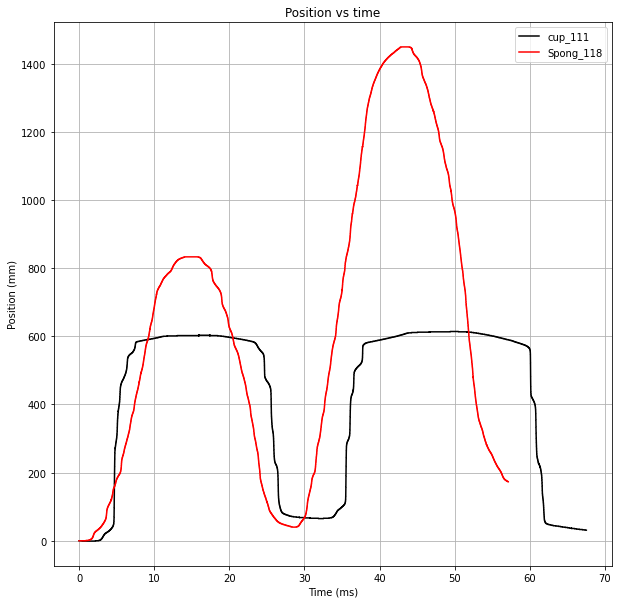

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
plt.figure(figsize=(10, 10))

plt.plot(cup_111[:,0], cup_111[:,3], c = 'k', label='cup_111')
plt.plot(input_data_matrix_118_3[:,0], input_data_matrix_118_3[:,3], c = 'r', label='Spong_118')

plt.xlabel('Time (ms)')
plt.ylabel('Position (mm)')
plt.title('Position vs time')

plt.legend()
plt.grid()
plt.show()

# Adding features

In [10]:
print(cup_111.shape[0])
print(input_data_matrix_118_3.shape[0])

# Creating freature metric 

# For cup
velocity_cup_111 = np.zeros([cup_111.shape[0],1])
print(velocity_cup_111.shape)

# For Sponge
velocity_sponge_118 = np.zeros([input_data_matrix_118_3.shape[0],1])
print(velocity_sponge_118.shape)


6100000
5200000
(6100000, 1)
(5200000, 1)


## 1 Velocity calculation - Filter method
---
use a filters to calculate the velocity

$$
{\frac{sg}{s+g}}
\tag{2}
$$

by calculating

$$
Y_n = g[X_n - {\frac{Y_{n-1}}{s}}]
\tag{3}
$$

in the program

|Symbol|Discription|
|:------------:|:--------------:|
|$$s$$|Laplas operator|
|$$g$$|Filter constent|
|$$X_n$$|$$n^{th}$$ operetion positon input|
|$$Y_n$$|$$n^{th}$$ operation velocity output|

In [11]:
# Cup

g = 3
x = 0
velocity_sum = 0
for x in range (cup_111.shape[0] - 1):
  time_deff = cup_111[(x+1),0] - cup_111[x,0]
  velocity_sum = velocity_sum + velocity_cup_111[x,0]*time_deff      
  velocity_cup_111[(x+1),0] = g*(cup_111[(x+1),3]*0.005 - velocity_sum)


In [12]:
# Sponge

g = 3
x = 0
velocity_sum = 0
for x in range (input_data_matrix_118_3.shape[0] - 1):
  time_deff = input_data_matrix_118_3[(x+1),0] - input_data_matrix_118_3[x,0]
  velocity_sum = velocity_sum + velocity_sponge_118[x,0]*time_deff      
  velocity_sponge_118[(x+1),0] = g*(input_data_matrix_118_3[(x+1),3]*0.005 - velocity_sum)


In [13]:
# First valiue of this becomes un 
velocity_sponge_118[0,0] = 0

## 2 Acceleration Calculation

In [14]:
print(cup_111.shape[0])
print(input_data_matrix_118_3.shape[0])

# Creating freature metric 

# For cup
acceleration_cup_111 = np.zeros([cup_111.shape[0],1])
print(acceleration_cup_111.shape)

# For Sponge
acceleration_sponge_118 = np.zeros([input_data_matrix_118_3.shape[0],1])
print(acceleration_sponge_118.shape)

6100000
5200000
(6100000, 1)
(5200000, 1)


In [15]:
window_with = 60000   # 
for x in range (cup_111.shape[0] - window_with):
  velocity_diff = velocity_cup_111[(x+window_with),0] - velocity_cup_111[x,0]   # from velocity colomn 4 - Filter based velocity
  time_deff = cup_111[(x+window_with),0] - cup_111[x,0]                               # from time colomn
  acceleration_cup_111[(x+window_with),0] = (velocity_diff)/time_deff
  

In [16]:
window_with = 60000   # 
for x in range (input_data_matrix_118_3.shape[0] - window_with):
  velocity_diff = velocity_sponge_118[(x+window_with),0] - velocity_sponge_118[x,0]         # from velocity colomn 4 - Filter based velocity
  time_deff = input_data_matrix_118_3[(x+window_with),0] - input_data_matrix_118_3[x,0]     # from time colomn
  acceleration_sponge_118[(x+window_with),0] = (velocity_diff)/time_deff


## 3 Stiffness variation 

In [18]:
print(cup_111.shape[0])
print(input_data_matrix_118_3.shape[0])

# Creating freature metric 

# For cup
stiffness_cup_111 = np.zeros([cup_111.shape[0],1])
print(acceleration_cup_111.shape)

# For Sponge
stiffness_sponge_118 = np.zeros([input_data_matrix_118_3.shape[0],1])
print(acceleration_sponge_118.shape)

6100000
5200000
(6100000, 1)
(5200000, 1)


In [19]:
x = 0 
for x in range (cup_111.shape[0]):
  if cup_111[x,3] != 0:
    stiffness_cup_111[x,0] = cup_111[x,2] / (cup_111[x,3]*0.005) 

In [20]:
for x in range (input_data_matrix_118_3.shape[0]):
  if input_data_matrix_118_3[x,3] != 0:
    stiffness_sponge_118[x,0] = input_data_matrix_118_3[x,2] / (input_data_matrix_118_3[x,3]*0.005) 


## 4 Energy absorbed - Area under under the curve


$$
{dx = (Encoder_{count_1} - Encoder_{count_0}) \times 0.005}
$$ 


$$
f = \frac{Force_1 + Force_0 }{2}
$$


$$
%{Energy_{sum} = \sum_{x = x_0}^{x_1}  f dx}
dA = f \times dx
$$


$$
Energy_{sum} = Energy_{sum} + dA
$$


dx > 0 when
$$
cos[tan^{-1}[ \frac{df}{dx} ]]  > 0
$$

dx < 0 when
$$
cos[tan^{-1}[ \frac{df}{dx} ]]  < 0
$$


In [21]:
print(cup_111.shape[0])
print(input_data_matrix_118_3.shape[0])

# Creating freature metric 

# For cup
energy_cup_111 = np.zeros([cup_111.shape[0],1])
print(energy_cup_111.shape)

# For Sponge
energy_sponge_118 = np.zeros([input_data_matrix_118_3.shape[0],1])
print(energy_sponge_118.shape)

6100000
5200000
(6100000, 1)
(5200000, 1)


In [22]:
cumulative_energy_sum = 0.0

# trapz rule of area under the curve

for x in range (1, cup_111.shape[0]-1, 1):
  cumulative_energy_sum = cumulative_energy_sum + ((cup_111[x,2] + cup_111[x+1,2])/2)*(cup_111[x+1,3] - cup_111[x,3])*0.005
  energy_cup_111[x+1,0] = cumulative_energy_sum

print(cumulative_energy_sum)

11.371603512500016


In [24]:
cumulative_energy_sum = 0.0

# trapz rule of area under the curve

for x in range (1, input_data_matrix_118_3.shape[0]-1, 1):
  cumulative_energy_sum = cumulative_energy_sum + ((input_data_matrix_118_3[x,2] + input_data_matrix_118_3[x+1,2])/2)*(input_data_matrix_118_3[x+1,3] - input_data_matrix_118_3[x,3])*0.005
  energy_sponge_118[x+1,0] = cumulative_energy_sum

print(cumulative_energy_sum)

10.440060450000018


# 2. Data frame creation

In [25]:
import pandas as pd

In [26]:
df111 = pd.DataFrame(cup_111,columns=['Time', 'ForceInput', 'ForceResponce', 'PositionResponce'])
df111.head()

Time  ForceInput  ForceResponce  PositionResponce
0  0.000000         0.0           -0.0               0.0
1  0.000012         0.0           -0.0               0.0
2  0.000021         0.0           -0.0               0.0
3  0.000033         0.0           -0.0               0.0
4  0.000044         0.0           -0.0               0.0

In [27]:
df118 = pd.DataFrame(input_data_matrix_118_3,columns=['Time', 'ForceInput', 'ForceResponce', 'PositionResponce'])
df118.head()

Time  ForceInput  ForceResponce  PositionResponce
0  0.000009    0.000000            0.0               0.0
1  0.000068    0.000004            0.0               0.0
2  0.000083    0.000027            0.0               0.0
3  0.000098    0.000033            0.0               0.0
4  0.000112    0.000039            0.0               0.0

In [28]:
target_cup_111 = np.empty([df111.shape[0],1])
target_cup_111[:,0] = 1
target_cup_111.shape


(6100000, 1)

In [29]:
target_spong_118 = np.empty([df118.shape[0],1])
target_spong_118[:,0] = 0
target_spong_118.shape

(5200000, 1)

In [30]:
df111['Object'] = target_cup_111
df118['Object'] = target_spong_118

In [42]:
df111['Velocity'] = velocity_cup_111
df118['Velocity'] = velocity_sponge_118

df111['Acceleration'] = acceleration_cup_111
df118['Acceleration'] = acceleration_sponge_118

df111['Stiffness'] = stiffness_cup_111
df118['Stiffness'] = stiffness_sponge_118

df111['Energy'] = energy_cup_111
df118['Energy'] = energy_sponge_118

df111

Time  ForceInput  ForceResponce  PositionResponce  Object  \
0         0.000000         0.0      -0.000000               0.0     1.0   
1         0.000012         0.0      -0.000000               0.0     1.0   
2         0.000021         0.0      -0.000000               0.0     1.0   
3         0.000033         0.0      -0.000000               0.0     1.0   
4         0.000044         0.0      -0.000000               0.0     1.0   
...            ...         ...            ...               ...     ...   
6099995  67.511727         0.0      -0.000005              31.0     1.0   
6099996  67.511734         0.0      -0.000005              31.0     1.0   
6099997  67.511750         0.0      -0.000005              31.0     1.0   
6099998  67.511765         0.0      -0.000005              31.0     1.0   
6099999  67.511772         0.0      -0.000005              31.0     1.0   

         Velocity  Acceleration  Stiffness     Energy  
0        0.000000      0.000000   0.000000   0.000000  
1        0.000000      0.000000   0.000000   0.000000  
2        0.000000      0.000000   0.000000   0.000000  
3        0.000000      0.000000   0.000000   0.000000  
4        0.000000      0.000000   0.000000   0.000000  
...           ...           ...        ...        ...  
6099995 -0.013763     -0.005118  -0.000032  11.371604  
6099996 -0.013763     -0.005118  -0.000032  11.371604  
6099997 -0.013762     -0.005117  -0.000032  11.371604  
6099998 -0.013761     -0.005117  -0.000032  11.371604  
6099999 -0.013761     -0.005117  -0.000032  11.371604  

[6100000 rows x 9 columns]

In [43]:
df118

Time  ForceInput  ForceResponce  PositionResponce  Object  \
0         0.000009    0.000000       0.000000               0.0     0.0   
1         0.000068    0.000004       0.000000               0.0     0.0   
2         0.000083    0.000027       0.000000               0.0     0.0   
3         0.000098    0.000033       0.000000               0.0     0.0   
4         0.000112    0.000039       0.000000               0.0     0.0   
...            ...         ...            ...               ...     ...   
5199995  57.124092    0.000000       0.006171             173.0     0.0   
5199996  57.124104    0.000000       0.006169             173.0     0.0   
5199997  57.124111    0.000000       0.006167             173.0     0.0   
5199998  57.124123    0.000000       0.006165             173.0     0.0   
5199999  57.124138    0.000000       0.006163             173.0     0.0   

         Velocity  Acceleration  Stiffness    Energy  
0        0.000000      0.000000   0.000000   0.00000  
1        0.000000      0.000000   0.000000   0.00000  
2        0.000000      0.000000   0.000000   0.00000  
3        0.000000      0.000000   0.000000   0.00000  
4        0.000000      0.000000   0.000000   0.00000  
...           ...           ...        ...       ...  
5199995 -0.096137      0.202235   0.007134  10.44006  
5199996 -0.096133      0.202228   0.007132  10.44006  
5199997 -0.096131      0.202223   0.007129  10.44006  
5199998 -0.096128      0.202216   0.007127  10.44006  
5199999 -0.096123      0.202199   0.007125  10.44006  

[5200000 rows x 9 columns]

## Combining datasets

In [44]:
Haptic_data_set_1 = pd.concat([df111, df118], ignore_index=True)
Haptic_data_set_1

Time  ForceInput  ForceResponce  PositionResponce  Object  \
0          0.000000         0.0      -0.000000               0.0     1.0   
1          0.000012         0.0      -0.000000               0.0     1.0   
2          0.000021         0.0      -0.000000               0.0     1.0   
3          0.000033         0.0      -0.000000               0.0     1.0   
4          0.000044         0.0      -0.000000               0.0     1.0   
...             ...         ...            ...               ...     ...   
11299995  57.124092         0.0       0.006171             173.0     0.0   
11299996  57.124104         0.0       0.006169             173.0     0.0   
11299997  57.124111         0.0       0.006167             173.0     0.0   
11299998  57.124123         0.0       0.006165             173.0     0.0   
11299999  57.124138         0.0       0.006163             173.0     0.0   

          Velocity  Acceleration  Stiffness    Energy  
0         0.000000      0.000000   0.000000   0.00000  
1         0.000000      0.000000   0.000000   0.00000  
2         0.000000      0.000000   0.000000   0.00000  
3         0.000000      0.000000   0.000000   0.00000  
4         0.000000      0.000000   0.000000   0.00000  
...            ...           ...        ...       ...  
11299995 -0.096137      0.202235   0.007134  10.44006  
11299996 -0.096133      0.202228   0.007132  10.44006  
11299997 -0.096131      0.202223   0.007129  10.44006  
11299998 -0.096128      0.202216   0.007127  10.44006  
11299999 -0.096123      0.202199   0.007125  10.44006  

[11300000 rows x 9 columns]

# Decision tree - ML work

In [49]:
X = Haptic_data_set_1.drop(['Object'], axis=1)
y = Haptic_data_set_1['Object']

In [50]:
# for headdings 
feature_names = ['Time', 'ForceInput', 'ForceResponce', 'PositionResponce', 'Velocity', 'Acceleration','Stiffness','Energy']
object_list = ['cup','spong']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.02)

In [52]:
from sklearn import tree

# setting up the decition tree
clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=7)

# to get the decision tree model training
clf_gini = clf_gini.fit(X_train, Y_train)

# for get the accuracy
y_pred_gini = clf_gini.predict(X_test)



[Text(1517.0625, 3185.15625, 'PositionResponce <= 614.5\ngini = 0.497\nsamples = 11074000\nvalue = [5096136, 5977864]\nclass = spong'),
 Text(1377.5625, 2760.46875, 'Energy <= 5.916\ngini = 0.42\nsamples = 8543384\nvalue = [2565520, 5977864]\nclass = spong'),
 Text(837.0, 2335.78125, 'Time <= 6.4\ngini = 0.336\nsamples = 2658927\nvalue = [2091380, 567547]\nclass = cup'),
 Text(697.5, 1911.09375, 'ForceResponce <= 1.173\ngini = 0.5\nsamples = 1149057\nvalue = [581510, 567547]\nclass = cup'),
 Text(418.5, 1486.40625, 'PositionResponce <= -0.5\ngini = 0.434\nsamples = 852863\nvalue = [581508, 271355]\nclass = cup'),
 Text(279.0, 1061.71875, 'gini = 0.0\nsamples = 156031\nvalue = [0, 156031]\nclass = spong'),
 Text(558.0, 1061.71875, 'PositionResponce <= 7.5\ngini = 0.276\nsamples = 696832\nvalue = [581508, 115324]\nclass = cup'),
 Text(279.0, 637.03125, 'Time <= 1.958\ngini = 0.488\nsamples = 271749\nvalue = [157189, 114560]\nclass = cup'),
 Text(139.5, 212.34375, 'gini = 0.306\nsamples =

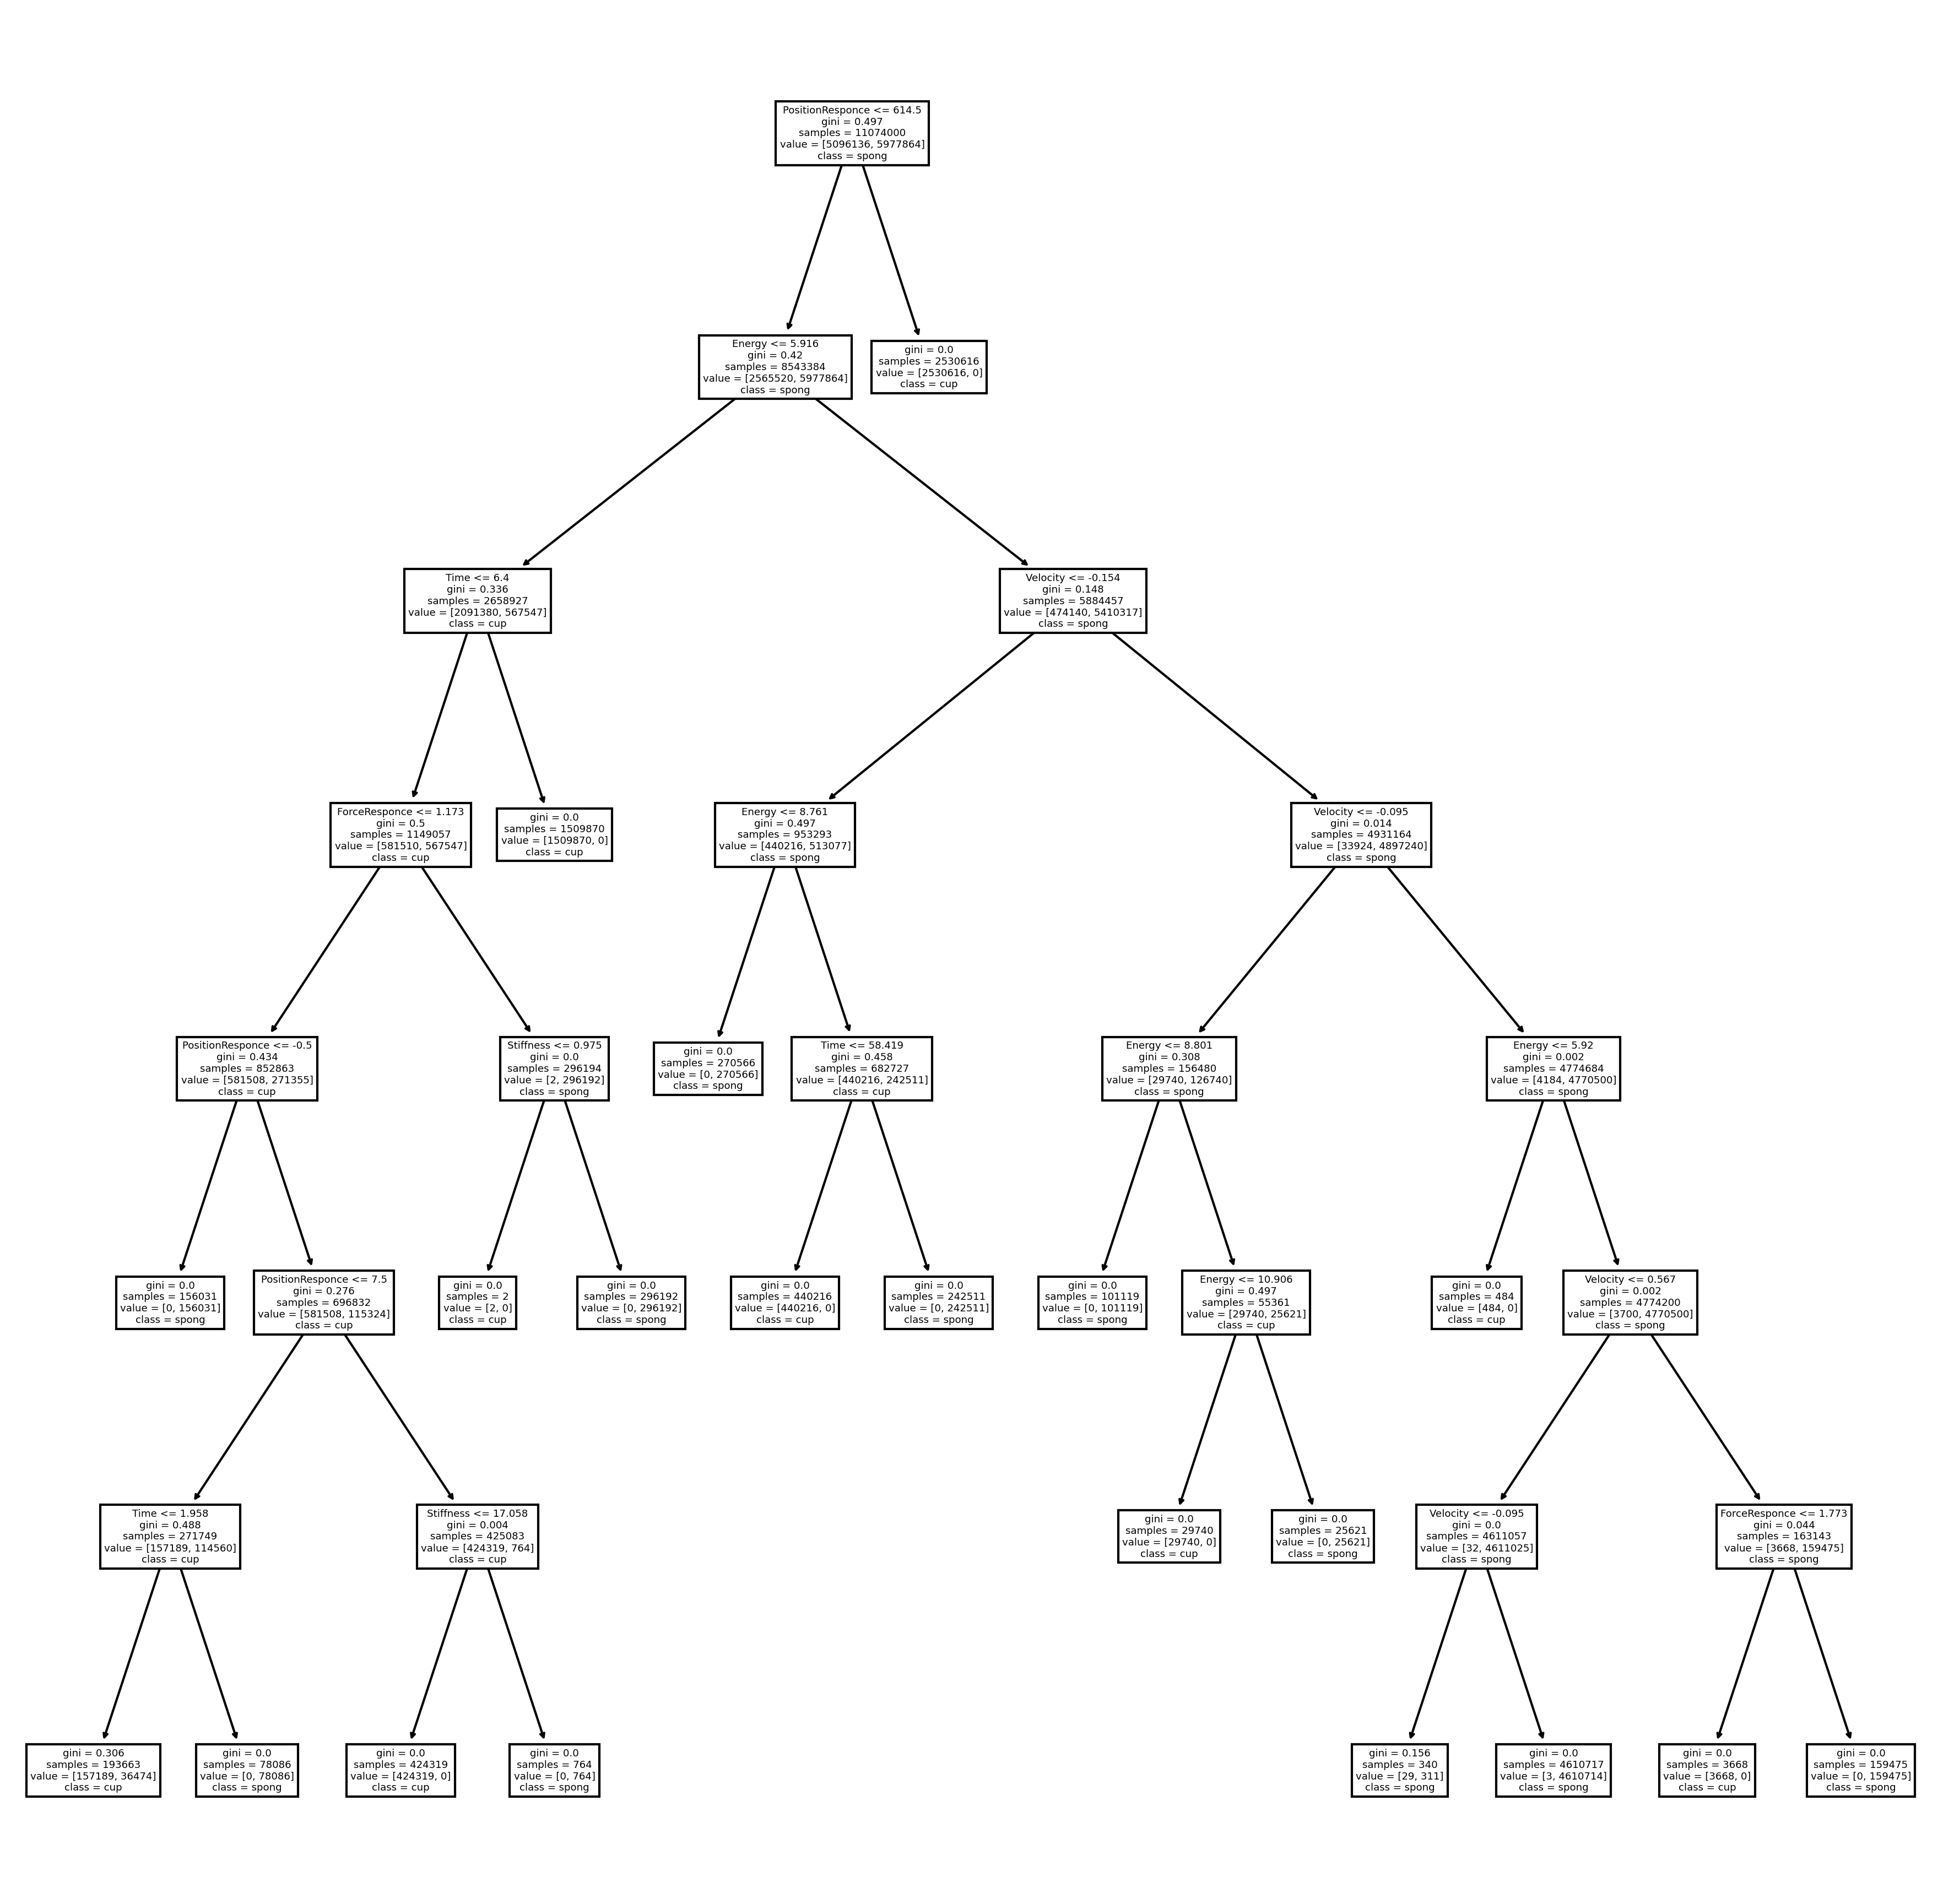

In [53]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15), dpi=300)
tree.plot_tree(clf_gini, feature_names=feature_names, class_names=object_list)

In [54]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9967
